IMPORTAMOS LAS LIBRERIAS

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

LEEMOS EL CSV & SE GUARDA EN UN DATAFRAME

In [2]:
df = pd.read_csv('../../../Grupo5_Analisis/Data/USAR/2021_population.csv')
df.head()

,iso_code,country,2021_last_updated,2020_population,area,density_sq_km,growth_rate,world_%,rank
0,CHN,China,"1,447,065,329","1,439,323,776","9,706,961 sq_km",149/sq_km,0.34%,18.34%,1
1,IND,India,"1,401,310,563","1,380,004,385","3,287,590 sq_km",424/sq_km,0.97%,17.69%,2
2,USA,United States,"334,058,426","331,002,651","9,372,610 sq_km",36/sq_km,0.58%,4.23%,3
3,IDN,Indonesia,"278,037,263","273,523,615","1,904,569 sq_km",145/sq_km,1.04%,3.51%,4
4,PAK,Pakistan,"227,724,796","220,892,340","881,912 sq_km",255/sq_km,1.95%,2.86%,5


VERIFICAMOS LOS NULOS

In [3]:
df.isnull().sum()

iso_code             0
country              0
2021_last_updated    0
2020_population      0
area                 0
density_sq_km        0
growth_rate          0
world_%              0
rank                 0
dtype: int64

VERIFICAMOS LAS COLUMNAS

In [4]:
df.columns

Index(['iso_code', 'country', '2021_last_updated', '2020_population', 'area',
       'density_sq_km', 'growth_rate', 'world_%', 'rank'],
      dtype='object')

ELIMINAMOS LAS COLUMNAS QUE NO NECESITAMOS

In [5]:
df.drop('iso_code', axis=1, inplace=True)

ELIMINAMOS LAS COMAS, PARA USAR LOS NUMEROS COMO INT & LIMPPIAMOS LAS LETRAS QUE NO SE USAN

In [6]:
def replace(data, col_name):
    data[col_name] = data[col_name].str.replace(',' , '')
    data[col_name] = data[col_name].str.replace("sq_km", "")
    data[col_name] = data[col_name].str.replace("%", "")
    data[col_name] = pd.to_numeric(data[col_name])

replace(df, '2021_last_updated')
replace(df, '2020_population')
replace(df, 'area')
replace(df, 'growth_rate')
replace(df, 'world_%')

VERIFICAMOS

In [18]:
df.head()

,country,2021_last_updated,2020_population,area,density_sq_km,growth_rate,world_%,rank
0,China,1447065329,1439323776,9706961,149/sq_km,0.34,18.34,1
1,India,1401310563,1380004385,3287590,424/sq_km,0.97,17.69,2
2,United States,334058426,331002651,9372610,36/sq_km,0.58,4.23,3
3,Indonesia,278037263,273523615,1904569,145/sq_km,1.04,3.51,4
4,Pakistan,227724796,220892340,881912,255/sq_km,1.95,2.86,5


UBICAMOS EL TOP 10 DE LOS PAISES CON MAYOR POBLACION & VISUALIZACION

In [8]:
large_pop = df.nlargest(10, 'area')

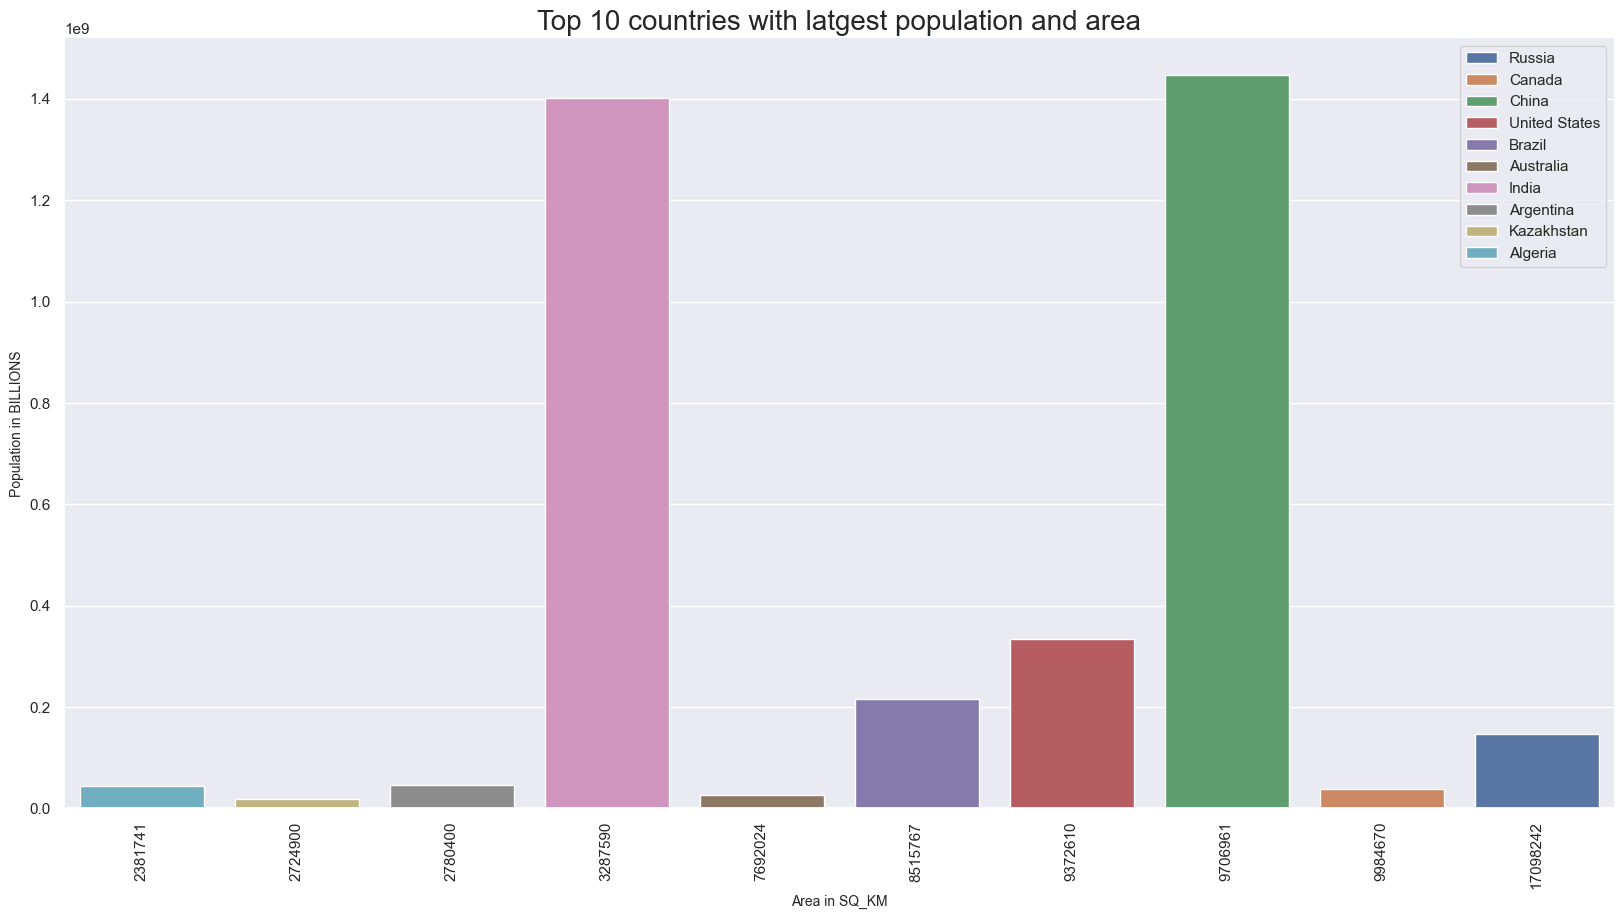

In [9]:
g = sns.barplot(data=large_pop, x = 'area', y= '2021_last_updated', hue='country', dodge= False)#, kind='bar')
g.figure.set_size_inches(20,10)
g.set_ylabel('Population in BILLIONS', size=10)
g.set_xlabel('Area in SQ_KM', size=10)
plt.legend(loc='upper right')
sns.despine()
plt.xticks(rotation = 'vertical')
plt.title('Top 10 countries with latgest population and area' , size=20)
plt.show()

In [19]:
top_10_country_pop = df[:10]
least_10_country_pop = df[-10:]

In [25]:
colors = ['lightslategray',] * 10
colors[0] = 'crimson'

fig = go.Figure(data=[go.Bar(
    x= top_10_country_pop['country'],
    y= top_10_country_pop['2021_last_updated'],
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='The 10 most populated countries in the world')

UBICAMOS EL TOP 10 DE CIUDADES CON MAYOR POBLACION EN EL MUNDO

In [26]:
colors = ['blue'] * 10
colors[9] = 'skyblue'

fig = go.Figure(data=[go.Bar(
    x= least_10_country_pop['country'],
    y= least_10_country_pop['2021_last_updated'],
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='The 10 least populated countries in the world now')

UBICAMOS EL TOP 10 DE PAISES CON MAYOR TASA DE CRECIMIENTO Y VISUALIZAMOS CON PIEPLOT

In [10]:
top_count = df.nlargest(10, 'growth_rate')

In [13]:
fig = px.pie(top_count, names= 'country', values= 'growth_rate', color= 'country')
fig.update_layout(title_text ='Top 10 counties with highest growth rate')
fig.show()

UBICAMOS EL TOP 10 DE PAISES & SU CONTRIBUCION A LA POBLACION MUNDIAL

In [14]:
contri = df.nlargest(10, 'world_%')

VISUALIZAMOS CON UN PIEPLOT

In [15]:
fig = px.pie(contri, names= 'country', values= 'world_%', color= 'country')
fig.update_layout(title_text= 'Top 10 countries and their contribution to world population')
fig.show()

VISUALIZAMOS LOS PAISES EN MAPA MUNDIAL

In [17]:
#plt.figure(figsize=(35,10))
fig = px.choropleth(contri , locations = 'country',
                locationmode= 'country names', color='country'
                , projection = 'natural earth'
                )
fig.update_layout(
        autosize=False,
        margin = dict(
                l=0,
                r=0,
                b=0,
                t=0,
                pad=4,
                autoexpand=True
        ),
        width=800,
        height=400,
title_text = 'Loaction of countries on the world map',
title_y=0.98
)

CONCLUCIONES:
* CHINA, INDIA Y LOS ESTADOS UNIDOS SON LOS PAISES , REPRESENTANDO APROXIMADAMENTE EL 52% DE LA POBLACION MUNDIAL
* INDIA SE PROYECTA A SER EL PRIMER PAIS CON MAYOR POBLACION EN EL MUNDO, PASARA A CHINA

EDAS

<Axes: xlabel='2021_last_updated', ylabel='Count'>

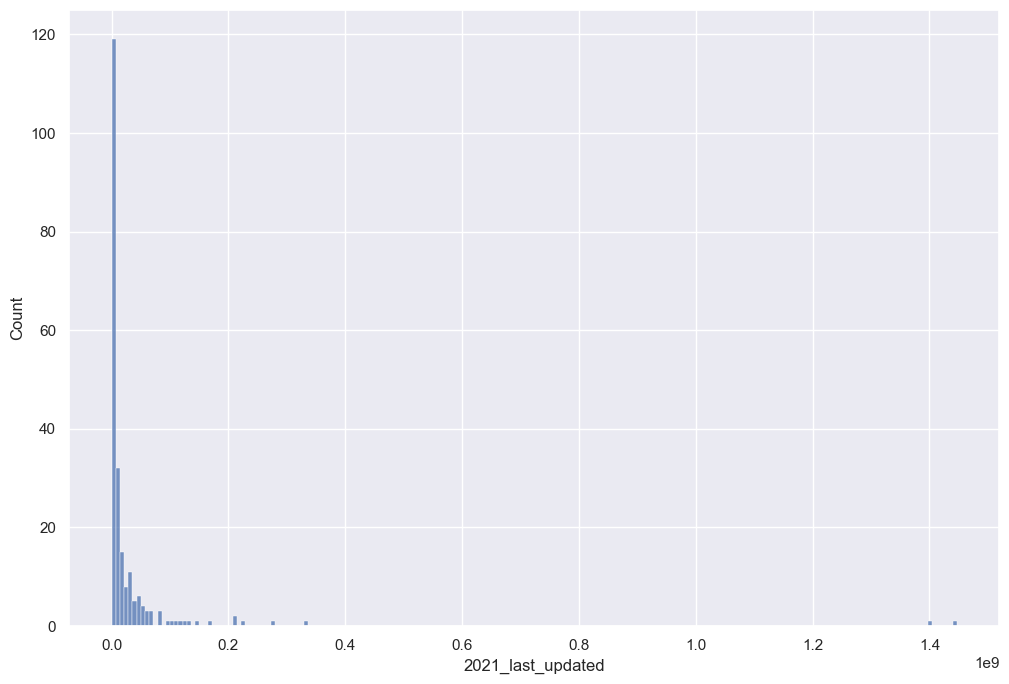

In [27]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='2021_last_updated')

<Axes: xlabel='2021_last_updated', ylabel='Count'>

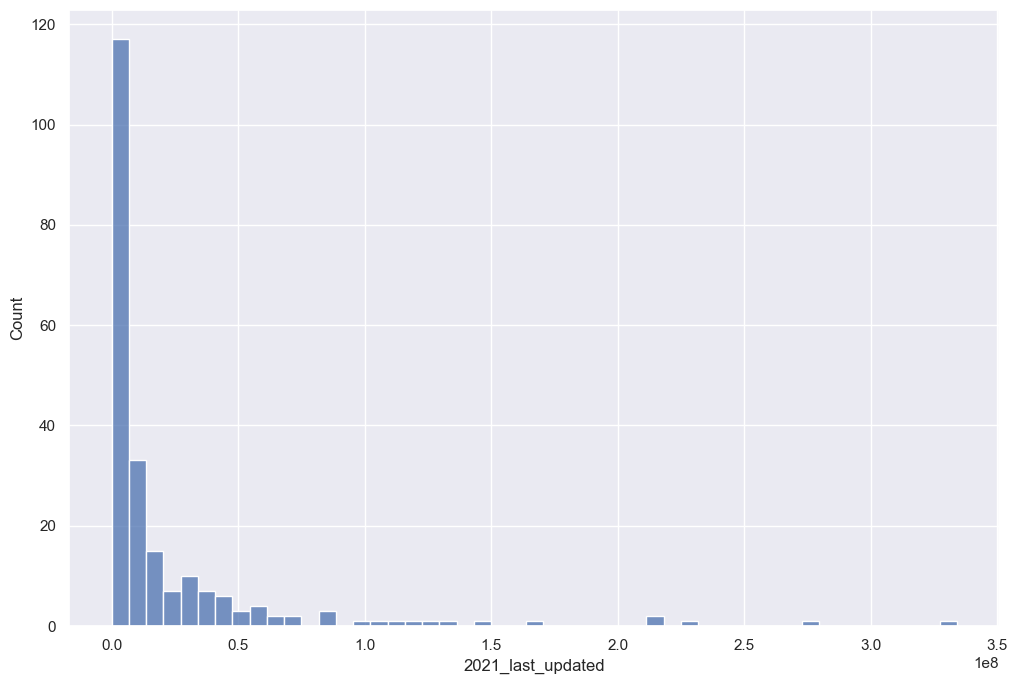

In [28]:
plt.figure(figsize=(12,8))
filter = df['2021_last_updated'] < 1000000000
sns.histplot(data=df[filter], x='2021_last_updated')

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

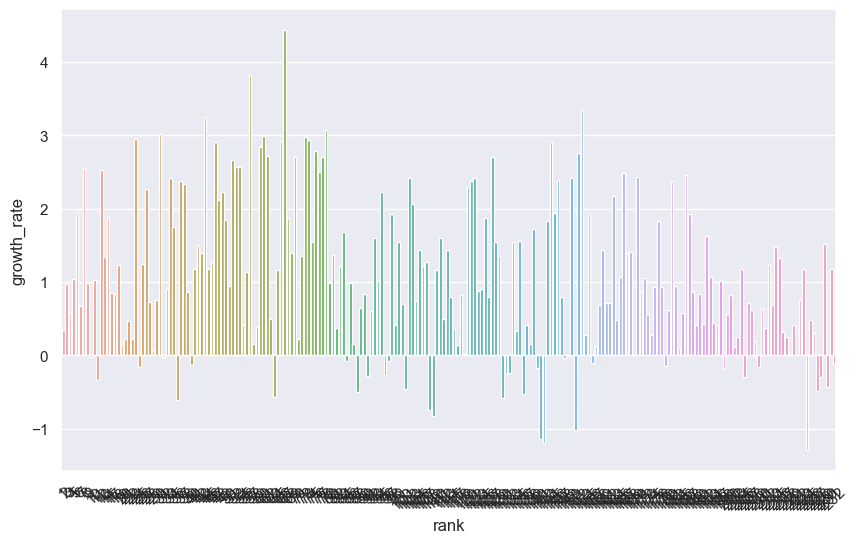

In [38]:
rank= df[:10]

plt.figure(figsize=(10,6))
sns.barplot(data=df.sort_values('growth_rate', ascending=False), x='rank', y='growth_rate')
plt.xticks(rotation=45)

<Axes: xlabel='growth_rate', ylabel='area'>

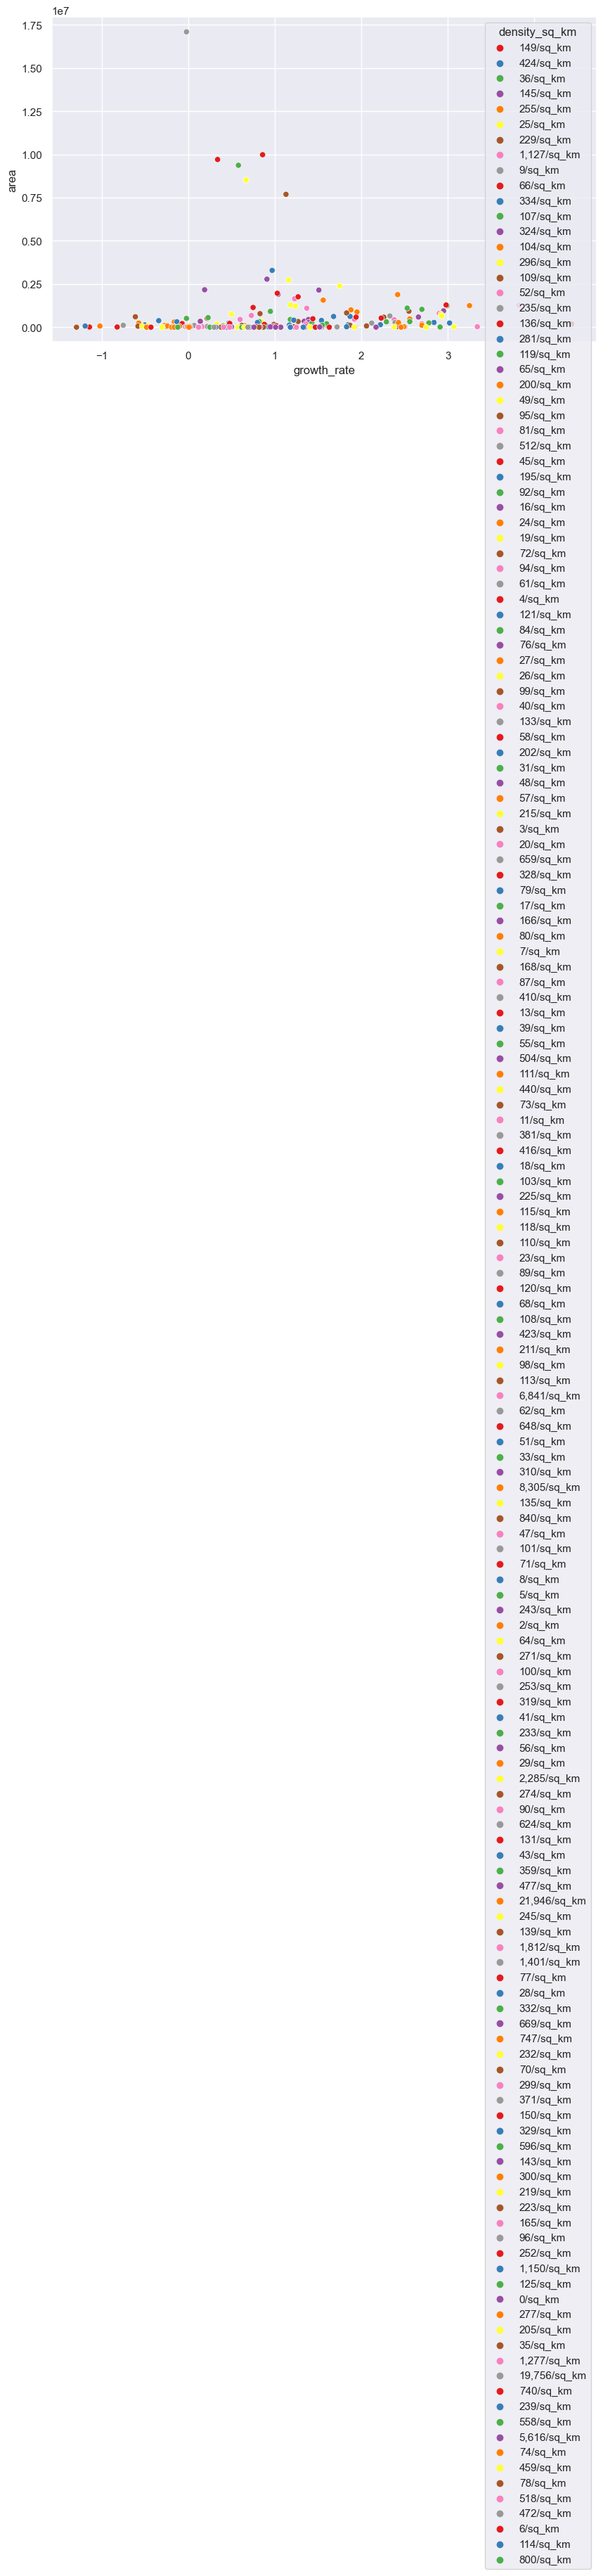

In [40]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='growth_rate', y ='area', hue='density_sq_km', palette='Set1')